In [120]:
import os
import pickle
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
from functools import partial
import pyproj
from shapely.ops import transform

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [123]:
#unpack the grid search results from the pickle file:
pkldf = pickle.load(open('grid_search_results_pickle.pkl','rb'))
desert_list = pkldf[1]
zip_deserts_df = pkldf[0]

# Loading the zip code polygon files
polygon_file = 'CAMS_ZIPCODE_STREET_SPECIFIC.shp'
polygons_df = gpd.read_file(polygon_file)
polygons_df = polygons_df.to_crs(epsg=4326)

#new df w/ only the columns we need:
polygons_df = polygons_df[['Zip_Num', 'geometry']].rename(columns={'Zip_Num':'zip_code'})

#convert list of desert points from grid search into df:
deserts_gdf = {'geometry': desert_list}
deserts_gdf = gpd.GeoDataFrame(geo)

# merge zip_deserts and polygons
grocery_density_df = polygons_df.merge(zip_deserts_df, left_on='zip_code', right_on='zip_code', how='outer')

Text(351.585887334, 0.5, 'Latitude')

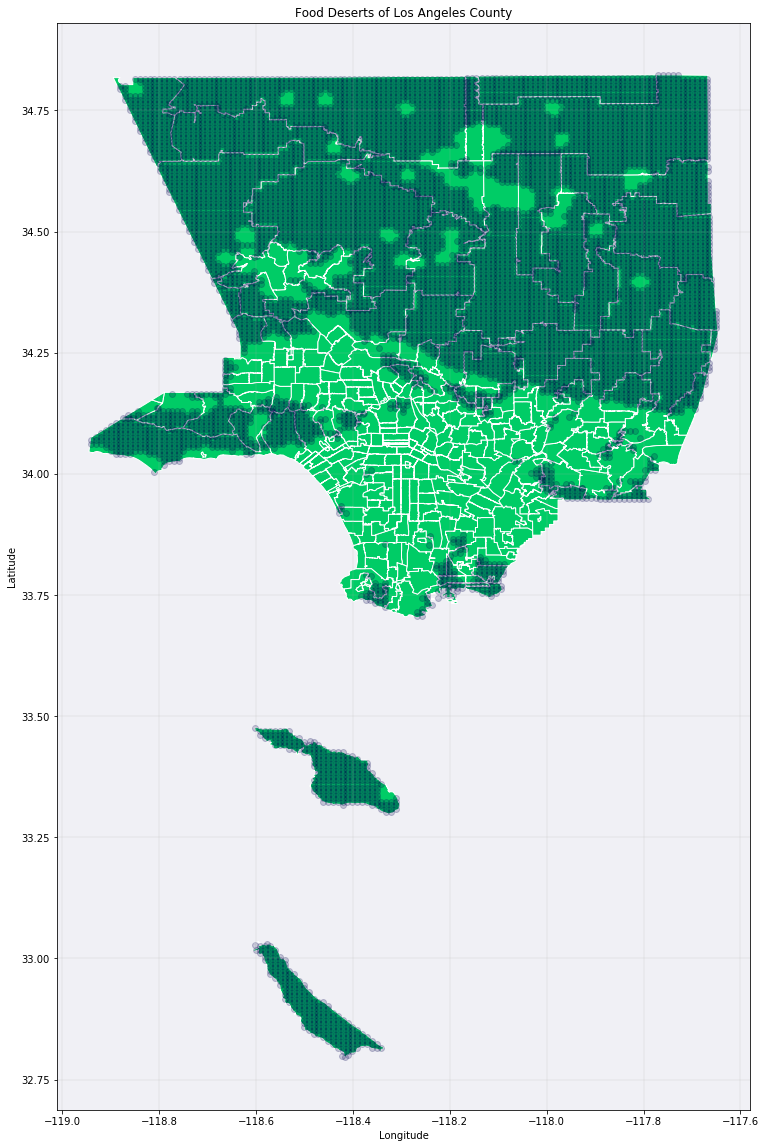

In [124]:
# Plot the zip code polygons, and then overlay the food desert points:
ax = zip_df.plot(figsize=(20,20), color='#00cc66', edgecolor='white')
deserts_gdf.plot(color='#00004d', alpha=0.2, ax=ax)
ax.set_facecolor('#f0f0f5')
plt.grid(linewidth=0.2)
plt.title('Food Deserts of Los Angeles County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

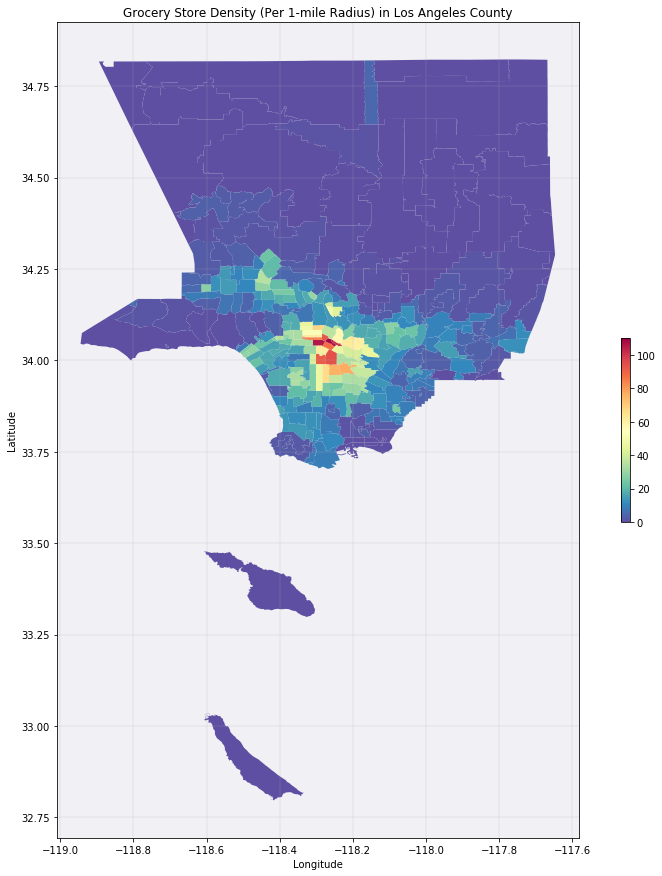

In [125]:
fig, ax = plt.subplots(figsize = (15,15))
cmap = 'Spectral_r'
#Color bar is created below
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=110))
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=.011)

ax.set_facecolor('#f0f0f5')
plt.title('Grocery Store Density (Per 1-mile Radius) in Los Angeles County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(linewidth=0.2)
ax_zip = grocery_density_df.plot(column='avg_num_nearby_groceries', ax=ax, cmap=cmap, vmin=0, vmax =110)